# **INbreast Cancer Dataset**

* URL - https://www.kaggle.com/datasets/ramanathansp20/inbreast-dataset

* The images of the dataset are given in a DCM format, Which is an medical format used for DICOM which stands for Digital Imaging and Communications in Medicine. This is the common file format used to store medical imaging data when a patient undergoes a CT, MRI, PET, UltraSound, and many other types of medical scans.

* The images are need to be converted to a jpg format to further process the dataset.




# **Converting DICOM images to JPG Format**

### **Installing Dependencies**

In [1]:
%%capture
!pip install pydicom

### **Importing Libraries**

In [2]:
import pydicom 
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image 
import numpy as np
import matplotlib.image as mpimg

from scipy import ndimage
from skimage import morphology

### **Getting the Dataset Path**

In [3]:
path = "/content/drive/MyDrive/INBreastCancer/AllDICOMs/"
single_img_path = "/content/drive/MyDrive/INBreastCancer/AllDICOMs/20586908_6c613a14b80a8591_MG_R_CC_ANON.dcm"
target_path = "/content/drive/MyDrive/INBreastCancer/IMAGES/"

In [4]:
medical_image = pydicom.read_file(single_img_path)
print(medical_image)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.1.241740140812485214905427915863105056665
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.0.100.4.0
(0002, 0013) Implementation Version Name         SH: 'MATLAB IPT 4.0'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.1.241740140812485214905427915863105056665
(0008, 0020) Study Date                          DA: ''
(0008, 0023) Content Date                        DA: '20111229'
(0008, 0030) Stud

In [5]:
img = medical_image.pixel_array
print(img.shape)

(4084, 3328)


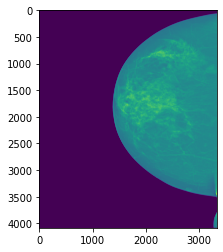

In [6]:
plt.imshow(img)
plt.show()

In [7]:
image_dir= os.listdir(path)

### **Saving the converted images to jpg format**

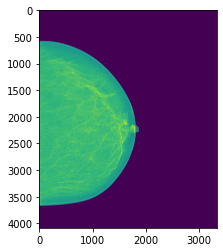

In [17]:
for img in image_dir:
  img_path = f'/content/drive/MyDrive/INBreastCancer/AllDICOMs/{img}'
  img_id = img.split("_")[0]
  
  im = pydicom.dcmread(img_path)
  im = im.pixel_array.astype(float)

  rescaled_image = (np.maximum(im,0)/im.max())*255 
  final_image = np.uint8(rescaled_image)

  final_image = Image.fromarray(final_image)
  plt.imshow(final_image)
  if os.path.exists("/content/drive/MyDrive/INBreastCancer/IMAGES/"):
    break
  else:
    os.mkdir("/content/drive/MyDrive/INBreastCancer/IMAGES")
    final_image.save(f"/content/drive/MyDrive/INBreastCancer/IMAGES/{img_id}.jpg")

### **Preprocessing the Dataset to process further** 

In [18]:
import re
import pandas as pd
import shutil
import sys

In [19]:
df = pd.read_csv("/content/drive/MyDrive/INBreastCancer/INbreast.csv",sep=";")
df.head()

,Patient ID,Patient age,Laterality,View,Acquisition date,File Name,ACR,Bi-Rads
0,removed,removed,R,CC,201001,22678622,4,1
1,removed,removed,L,CC,201001,22678646,4,3
2,removed,removed,R,MLO,201001,22678670,4,1
3,removed,removed,L,MLO,201001,22678694,4,3
4,removed,removed,R,CC,201001,22614074,2,5


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Patient ID        410 non-null    object
 1   Patient age       410 non-null    object
 2   Laterality        410 non-null    object
 3   View              410 non-null    object
 4   Acquisition date  410 non-null    int64 
 5   File Name         410 non-null    int64 
 6   ACR               410 non-null    object
 7   Bi-Rads           410 non-null    object
dtypes: int64(2), object(6)
memory usage: 25.8+ KB


### **Removing Characters from Bi-Rads**

In [21]:
df["Bi-Rads"].value_counts()

2     220
1      67
5      49
3      23
4c     22
4a     13
6       8
4b      8
Name: Bi-Rads, dtype: int64

In [22]:
df["Bi-Rads"].unique()

array(['1', '3', '5', '2', '4a', '4c', '6', '4b'], dtype=object)

In [23]:
df["Bi-Rads"] = df["Bi-Rads"].str.replace(r'[^0-9]+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [24]:
df["Bi-Rads"].unique()

array(['1', '3', '5', '2', '4', '6'], dtype=object)

In [25]:
df["Bi-Rads"] = df["Bi-Rads"].astype(int)

In [26]:
result = []
for bi in df["Bi-Rads"]:
  if bi == 1:
    result.append("Normal")
  elif bi > 1 and bi < 3:
    result.append("Benign")
  else:
    result.append("Malignant")

df["Severity"] = result   

In [27]:
df.head()

,Patient ID,Patient age,Laterality,View,Acquisition date,File Name,ACR,Bi-Rads,Severity
0,removed,removed,R,CC,201001,22678622,4,1,Normal
1,removed,removed,L,CC,201001,22678646,4,3,Malignant
2,removed,removed,R,MLO,201001,22678670,4,1,Normal
3,removed,removed,L,MLO,201001,22678694,4,3,Malignant
4,removed,removed,R,CC,201001,22614074,2,5,Malignant


In [28]:
df1 = df[["File Name", "Severity"]]
df1.head(3)

,File Name,Severity
0,22678622,Normal
1,22678646,Malignant
2,22678670,Normal


In [29]:
df1["File Name"] = df1["File Name"].astype("str")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### **Creating Directory for each class name and appending images**

In [30]:
labels = df1
dir = r"/content/drive/MyDrive/INBreastCancer/IMAGES/"
target_dir = r"/content/drive/MyDrive/INBreastCancer/IMAGE_CLASS/"

for filename, class_name in labels.values:

  if not os.path.exists(target_dir + str(class_name)):
    os.mkdir(target_dir + str(class_name))
  
  src_path = dir + "/" + filename + ".jpg"
  dst_path = target_dir + str(class_name) + "/" + filename + ".jpg"

  try:
    shutil.copy(src_path, dst_path)
  except IOError as e:
    print(f"Unable to copy file {src_path} to {dst_path}")
  except:
    print(f"When try to copy file {src_path} to {dst_pth}, unexpected error:{sys.exc_info()}")

In [31]:
b = os.listdir("/content/drive/MyDrive/INBreastCancer/IMAGE_CLASS/Benign")
m = os.listdir("/content/drive/MyDrive/INBreastCancer/IMAGE_CLASS/Malignant")
n = os.listdir("/content/drive/MyDrive/INBreastCancer/IMAGE_CLASS/Normal")

print(f"Number of images in Benign: {len(b)}")
print(f"Number of images in Malignant: {len(m)}")
print(f"Number of images in Normal: {len(n)}")

Number of images in Benign: 220
Number of images in Malignant: 123
Number of images in Normal: 67


# **Building Resnet50 model to detect the class of image**

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import keras

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

In [33]:
img_size = 256
batch_size = 2

In [35]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/INBreastCancer/IMAGE_CLASS/",
                                                             shuffle= True,
                                                             seed = 12,
                                                             image_size=(img_size,img_size),
                                                             batch_size= batch_size)

Found 410 files belonging to 3 classes.


In [36]:
class_name = dataset.class_names
class_name

['Benign', 'Malignant', 'Normal']

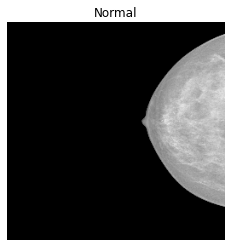

In [37]:
for img_batch, label_batch in dataset.take(1):
    plt.imshow(img_batch[1].numpy().astype("uint8"))
    plt.title(class_name[label_batch[1]])
    plt.axis("Off")

In [38]:
print("Number of batches in a Dataset:", len(dataset))

# Taking 80% of data for training purpose
train_ds = dataset.take(round(len(dataset)* 0.8))

# Skipping 80% of training data and Taking remaining 20% of data for Validation and Test
val_n_test = dataset.skip(round(len(dataset)*0.8))

# Taking 10% of data from val_n_test for validation and another 10% for test data
val_ds = val_n_test.take(round(len(val_n_test)*0.5))
test_ds = val_n_test.skip(round(len(val_n_test)*0.5))

print("Train Dataset:",len(train_ds))
print()
print("Number of batches selected for test and validation:", len(val_n_test))
print("Validation Dataset:",len(val_ds))
print("Test Dataset:", len(test_ds))

Number of batches in a Dataset: 13
Train Dataset: 10

Number of batches selected for test and validation: 3
Validation Dataset: 2
Test Dataset: 1


### **Model Architech**

In [39]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(3, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_ds,validation_data=val_ds,epochs=20)

94781440/94765736 [==============================] - 3s 0us/step
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - 32s 1s/step - loss: 3.0489 - accuracy: 0.3562 - val_loss: 1.5372 - val_accuracy: 0.6719
Epoch 2/20
10/10 [==============================] - 18s 1s/step - loss: 1.4214 - accuracy: 0.4437 - val_loss: 1.0983 - val_accuracy: 0.5312
Epoch 3/20
10/10 [==============================] - 18s 1s/step - loss: 0.9472 - accuracy: 0.5469 - val_loss: 0.8201 - val_accuracy: 0.6406
Epoch 4/20
10/10 [==============================] - 18s 1s/step - loss: 0.9242 - accuracy: 0.5281 - val_loss: 0.8534 - val_accuracy: 0.6406
Epoch 5/20
10/10 [==============================] - 18s 1s/step - loss: 0.8609 - accuracy: 0.5906 - val_loss: 0.7368 - val_accuracy: 0.6875
Epoch 6/20
10/10 [==============================] - 18s 1s/step - loss: 0.7674 - accuracy: 0.6531 - val_loss: 0.6600 - val_accuracy: 0.7031
Epoch 7/20
10/10 [==============================] - 18s 1s/step - loss: 0.7543 - accuracy: 0.6969 - val_loss: 0.6630 - val_accuracy: 0.7500
Epoch 8/20
10/10 [=============

In [40]:
scores = model.evaluate(test_ds)

1/1 [==============================] - 9s 9s/step - loss: 0.3349 - accuracy: 1.0000


In [41]:
scores

[0.33487334847450256, 1.0]

In [42]:
history.params

{'epochs': 20, 'steps': 10, 'verbose': 1}

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [44]:
loss = history.history["loss"]
acc = history.history["accuracy"]

val_loss = history.history["val_loss"]
val_acc = history.history["val_accuracy"]

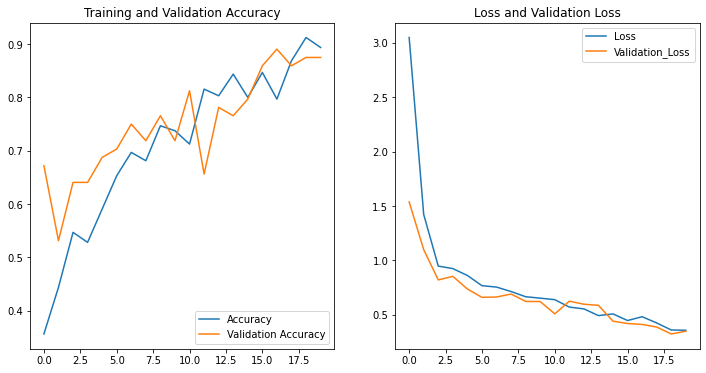

In [45]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(20), acc, label="Accuracy")
plt.plot(range(20), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")


plt.subplot(1,2,2)
plt.plot(range(20), loss, label="Loss")
plt.plot(range(20), val_loss,label="Validation_Loss")
plt.legend(loc="upper right")
plt.title("Loss and Validation Loss")
plt.show()

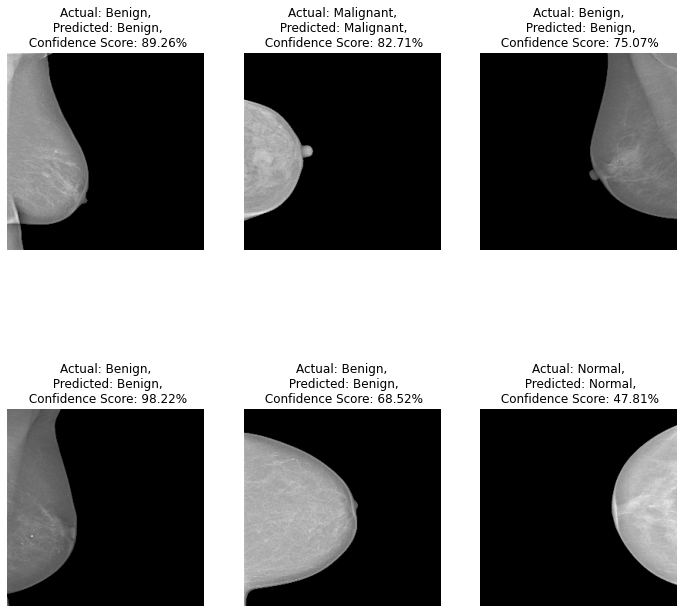

In [46]:
BATCH_SIZE = 6
plt.figure(figsize=(12, 12))
for images, labels in val_ds.take(1):
   for i in range(BATCH_SIZE):
      ax = plt.subplot(2, 3, i + 1)
      plt.imshow(images[i].numpy().astype('uint8'))
      actual_cls = class_name[labels[i]]
      prediction = model.predict(images)
      predicted_cls = class_name[np.argmax(prediction[i])]
      confidence = round(100 * (np.max(prediction[i])), 2)
      plt.title(f"Actual: {actual_cls},\n Predicted: {predicted_cls},\n Confidence Score: {confidence}%")
      plt.axis("off")

In [47]:
model.save("/content/drive/MyDrive/INBreastCancer/INbreastcancer_resnet50.h5")

In [48]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print("\nTestAccuracy:", test_acc)

1/1 - 8s - loss: 0.3064 - accuracy: 0.9231 - 8s/epoch - 8s/step

TestAccuracy: 0.9230769276618958


In [49]:
new_model = keras.models.load_model("/content/drive/MyDrive/INBreastCancer/INbreastcancer_resnet50.h5")


Benign
0.91


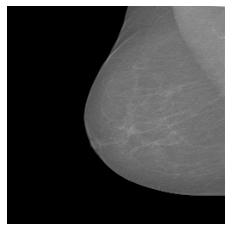

In [50]:
for img,label in test_ds.take(1):
  prediction = model.predict(img)
  print(class_name[np.argmax(prediction[0])])
  print(round(np.max(prediction[0]),2))
  plt.imshow(img[0].numpy().astype("uint8"))
  plt.axis("off")
  break